<a href="https://colab.research.google.com/github/KhantPhyo/Machine-Learning-with-Python---Scikit-Learn/blob/main/sk4%20sklearn_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.datasets import make_regression, make_classification  #for creating dataset

from sklearn.model_selection import train_test_split
from sklearn import metrics

The make_classification function in scikit-learn is a convenient tool for generating synthetic datasets for classification tasks. It's useful for testing and prototyping machine learning models.

___

n_features: This parameter specifies the number of features (or independent variables) in the dataset. In your example, n_features is set to 4, which means that the dataset X will have four features. These features are generated based on various statistical properties to create a synthetic dataset for a classification task.
Other commonly used parameters for make_classification include:

n_samples: Number of samples (data points) in the dataset.
n_classes: Number of classes (unique values in the target variable).
n_clusters_per_class: Number of clusters per class.
weights: The proportions of samples assigned to each class.
random_state: Seed for reproducibility.


__

X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    n_clusters_per_class=2,
    weights=[0.7, 0.3],
    random_state=42
)


___

In this example, we generate a dataset with 1000 samples, 5 features, 2 classes, 2 clusters per class, and a class distribution with 70% in class 0 and 30% in class 1. Adjusting these parameters allows you to create datasets that mimic various characteristics of real-world data.

In [ ]:
X, y = make_classification(n_features = 4, random_state = 0)
X.shape, y.shape

((100, 4), (100,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((70, 4), (30, 4))

DecisionTreeClassifier is a class in scikit-learn, a popular machine learning library in Python, used for implementing decision tree-based classification algorithms. Decision trees are a type of supervised machine learning model that can be used for both classification and regression tasks.

In the context of classification, a decision tree recursively splits the dataset into subsets based on the values of input features. At each node of the tree, a decision is made by evaluating a specific feature, and the data is split accordingly. This process is repeated until a stopping criterion is met, such as reaching a certain depth or having a minimum number of samples in a leaf node.


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.8666666666666667

The metrics.accuracy_score function in scikit-learn is a performance metric used for evaluating the accuracy of a classification model. It measures the ratio of correctly predicted instances to the total number of instances in the dataset. The formula for accuracy is:

Accuracy = Number of Correct Predictions / Total Number of Predictions

Here's an explanation of the key terms:

Number of Correct Predictions: The count of instances where the predicted class matches the actual class.

Total Number of Predictions: The total number of instances in the dataset.

___

accuracy number is good if betwee 0.95 to nearly 1 ( not 1 coz It can be overconfidient )



In [ ]:
clf.get_depth()

6

The get_depth method in scikit-learn's DecisionTreeClassifier returns the depth of the decision tree. The depth of a decision tree is the length of the longest path from the root node to a leaf node. It essentially measures the complexity or the number of levels in the tree.

___

algorithm (modle) is good if depth number is small.

In [ ]:
depths = np.arange(1,15)
scores = {}
scores_list = []
for d in depths:
  classifier = DecisionTreeClassifier(max_depth = d)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  scores[d] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
scores

{1: 1.0,
 2: 1.0,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9,
 6: 0.9,
 7: 0.9333333333333333,
 8: 0.9333333333333333,
 9: 0.9,
 10: 0.9,
 11: 0.9,
 12: 0.9,
 13: 0.9333333333333333,
 14: 0.9333333333333333}

Text(0, 0.5, 'Accuracy')

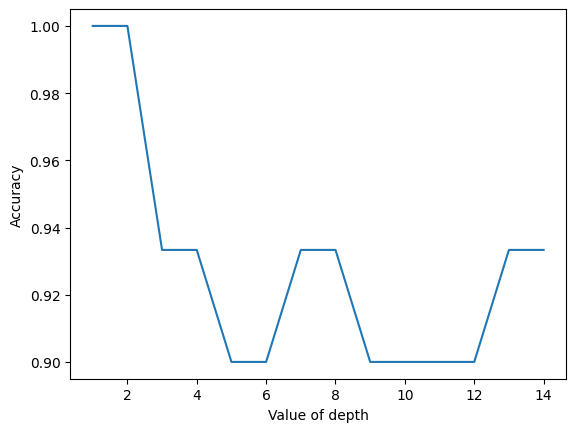

In [ ]:
plt.plot(depths,scores_list)
plt.xlabel("Value of depth")
plt.ylabel("Accuracy")

In [ ]:
X, y = make_regression(n_features = 4, random_state = 0)
X.shape, y.shape

((100, 4), (100,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((70, 4), (30, 4))

DecisionTreeRegressor is another class in scikit-learn, and it is specifically designed for implementing decision tree-based regression algorithms. While DecisionTreeClassifier is used for classification tasks where the goal is to assign a label to each input, DecisionTreeRegressor is used for regression tasks where the goal is to predict a continuous target variable.

The main difference lies in the nature of the output:

- DecisionTreeClassifier: This is used for classification tasks where the output is a class label. The decision tree aims to predict the class of the input data based on the features.

- DecisionTreeRegressor: This is used for regression tasks where the output is a continuous numerical value. The decision tree aims to predict a target variable that is a real number.

In [ ]:
#The default value for max_depth is set to None, meaning there is no maximum depth, and the tree will continue to grow until it reaches the stopping criteria mentioned earlier.
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred)
mse, reg.get_depth()

(4225.799741920269, 10)

The mean_squared_error function in scikit-learn's metrics module is a measure of the average squared difference between the predicted and actual values in a regression problem. It is commonly used to assess the performance of regression models.

The mean_squared_error function calculates the average squared difference between the actual and predicted values. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting better performance.

In [ ]:
depths = np.arange(1,15)
scores = {}
scores_list = []
for d in depths:
  reg = DecisionTreeRegressor(max_depth = d)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  scores[d] = metrics.mean_squared_error(y_test,y_pred)
  scores_list.append(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
scores

{1: 10993.773811324027,
 2: 9930.714300148302,
 3: 4372.765028195948,
 4: 4342.8825850846,
 5: 4606.63763215178,
 6: 5064.07128760961,
 7: 4454.512991537636,
 8: 4524.119914780254,
 9: 4645.16930180042,
 10: 4586.656586871472,
 11: 4186.328744290399,
 12: 5398.8841393025705,
 13: 5367.895768472664,
 14: 4710.8507276266155}

Text(0, 0.5, 'MSE')

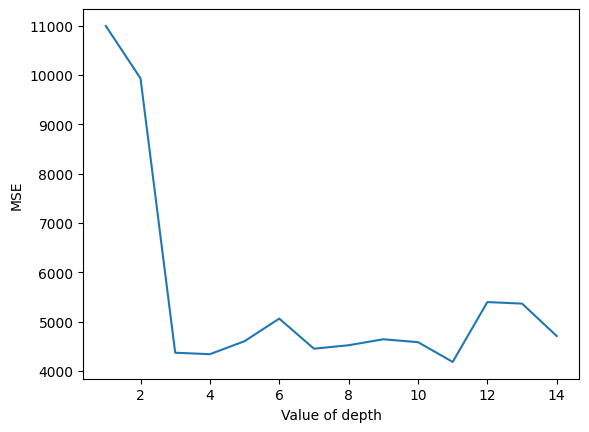

In [ ]:
plt.plot(depths,scores_list)
plt.xlabel("Value of depth")
plt.ylabel("MSE")

as result, 11 is good.

In [ ]:
reg = DecisionTreeRegressor(max_depth = 11)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred)
mse, reg.get_depth()

(3982.1010381719125, 10)

# DecisionTreeRegressor Example:
Dataset:

- The Boston Housing dataset contains information about various housing attributes in different neighborhoods of Boston.
Task:

- Regression: Predicting the median value of owner-occupied homes in thousands of dollars (target variable).
DecisionTreeRegressor Usage:

- We can use DecisionTreeRegressor to create a model that learns to predict the median house value based on features such as crime rate, number of rooms, etc.
Evaluation:

- The performance of the model can be assessed using regression metrics like Mean Squared Error (MSE), which measures the average squared difference between predicted and actual values.

# DecisionTreeClassifier Example:
Now, let's consider a different dataset: the famous Iris dataset.

Dataset:

- The Iris dataset contains measurements of various features of iris flowers, along with the species of each flower (setosa, versicolor, virginica).
Task:

- Classification: Predicting the species of an iris flower based on its features.
DecisionTreeClassifier Usage:

- We can use DecisionTreeClassifier to create a model that classifies iris flowers into different species.
Evaluation:

- The model's performance can be assessed using classification metrics like accuracy, precision, recall, or F1-score.